In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

## Loading the dataset

In [2]:
books=pd.read_csv("Books.csv", low_memory=False)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [3]:
Users=pd.read_csv("Users.csv")
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [4]:
Ratings=pd.read_csv("Ratings.csv")
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Dataset exploration & EDA

#### Books dataset

In [5]:
# Checking for Number of books
books['Book-Title'].nunique()

242135

In [6]:
# Checking for duplicates in books
books.duplicated().sum()

0

In [7]:
# Cehecking for null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Replacing & Dropping the null values

In [8]:
books['Book-Author'].fillna(books['Book-Author'].mode()[0], inplace=True)
books['Publisher'].fillna(books['Publisher'].mode()[0], inplace=True)
books.dropna(subset=['Image-URL-L'], inplace=True)

In [9]:
# Rechecking for null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [10]:
# Checking for Unique values
books.nunique()

ISBN                   271357
Book-Title             242132
Book-Author            102021
Year-Of-Publication       116
Publisher               16804
Image-URL-S            271041
Image-URL-M            271041
Image-URL-L            271041
dtype: int64

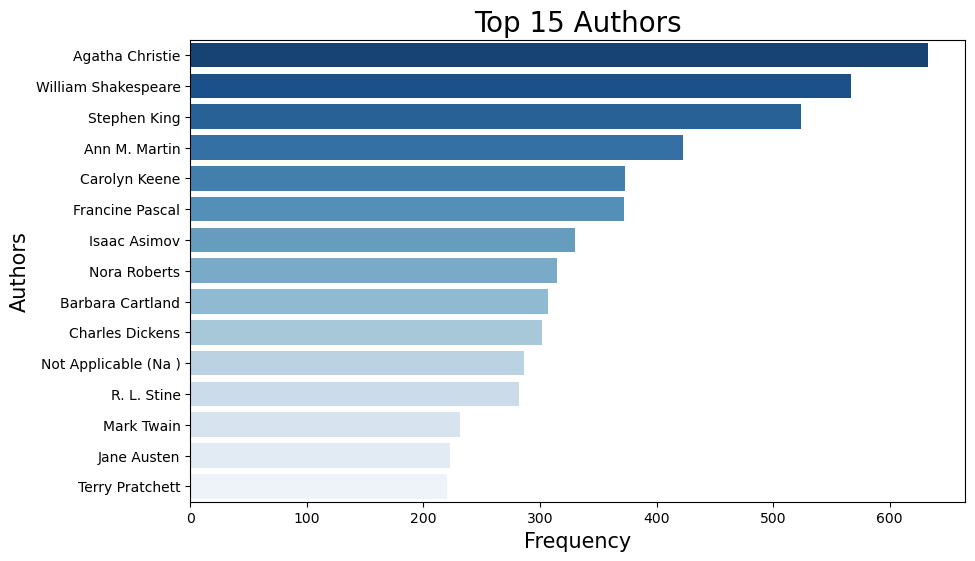

In [11]:
# No. of books by top 15 Authors 
Authors = books.groupby(['Book-Author'])['Book-Title'].count().sort_values(ascending=False).head(15).index
Authors_book_count = books.groupby(['Book-Author'])['Book-Title'].count().sort_values(ascending=False).head(15).values

plt.figure(figsize=(10, 6))
sns.barplot(y=Authors, x=Authors_book_count, palette='Blues_r')
plt.title('Top 15 Authors', fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Authors', fontsize=15)
plt.show()

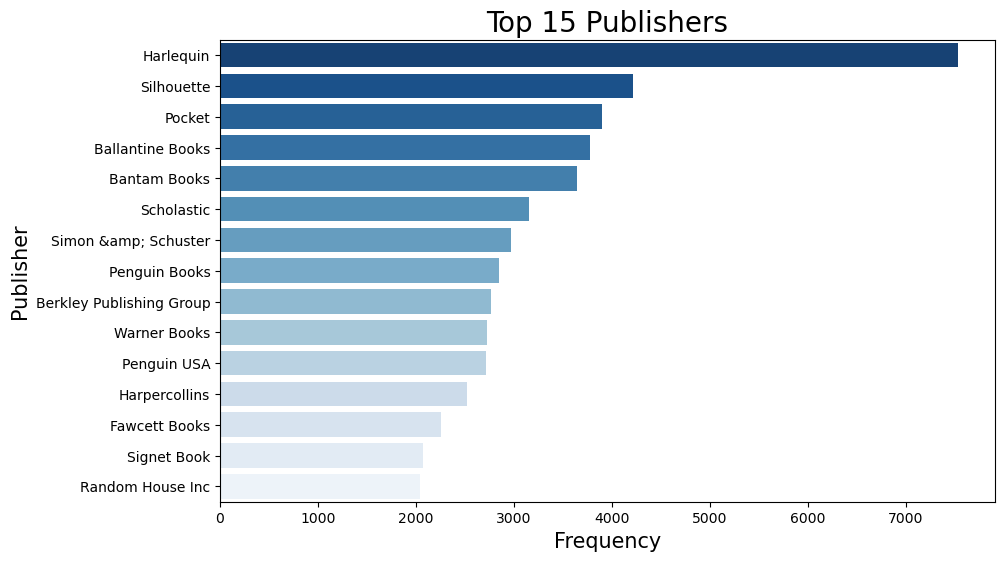

In [12]:
# No. of books by top 15 publisher
plt.figure(figsize=(10,6))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:15], palette='Blues_r')
plt.title("Top 15 Publishers", fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Publisher', fontsize=15)
plt.show()

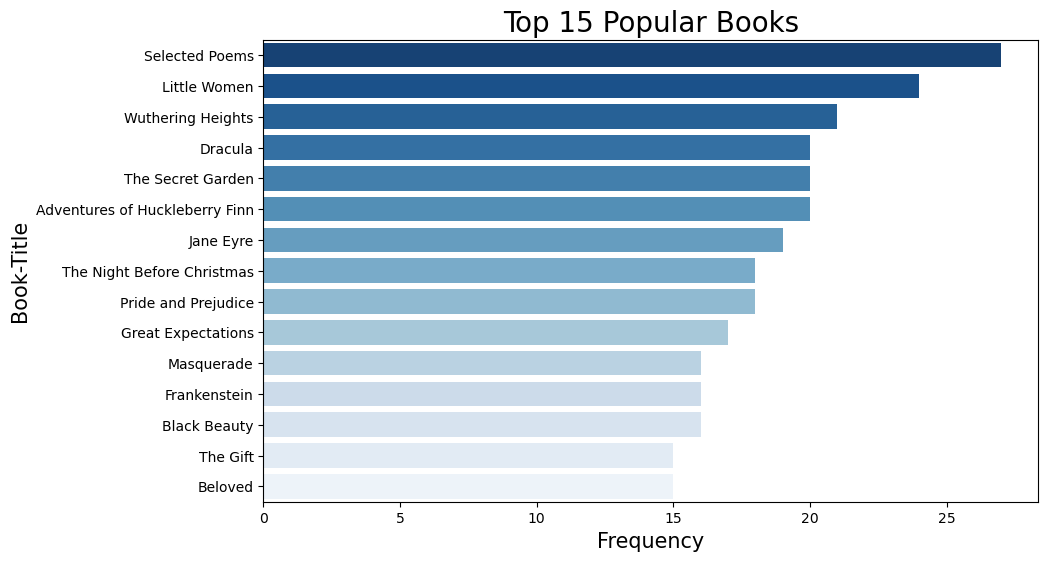

In [13]:
# Top 15 Popular books
plt.figure(figsize=(10,6))
sns.countplot(y="Book-Title", data=books, order=books['Book-Title'].value_counts().index[0:15], palette='Blues_r')
plt.title("Top 15 Popular Books", fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Book-Title', fontsize=15)
plt.show()

#### Users dataset

In [14]:
# Checking for Number of books
Users['User-ID'].nunique()

278858

In [15]:
# Checking for duplicates in books
Users.duplicated().sum()

0

In [16]:
# Cehecking for null values
Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

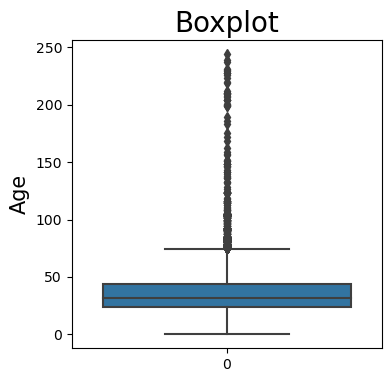

In [17]:
# Checking for outliers
plt.figure(figsize=(4,4))
sns.boxplot(Users['Age'])
plt.title('Boxplot', fontsize=20)
plt.ylabel('Age', fontsize=15)
plt.show()

In [18]:
# Dropping the age column
Users.drop('Age', axis=1, inplace=True)

In [19]:
# Checking for null values
Users.isnull().sum()

User-ID     0
Location    0
dtype: int64

In [20]:
# Checking for Unique values
Users.nunique()

User-ID     278858
Location     57339
dtype: int64

#### Ratings dataset

In [21]:
# Cehecking for null values
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [22]:
# Checking for Unique values
Ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

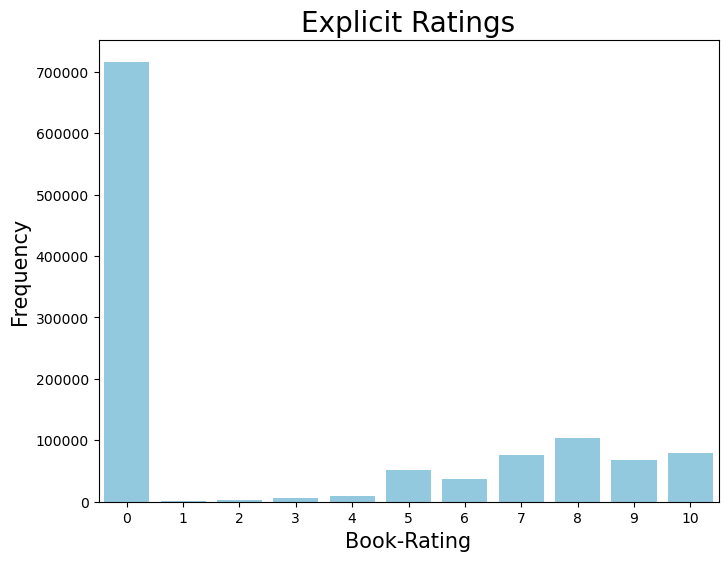

In [23]:
# Countplot of Ratings
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=Ratings, color='skyblue')
plt.title("Explicit Ratings", fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Book-Rating', fontsize=15)
plt.show()

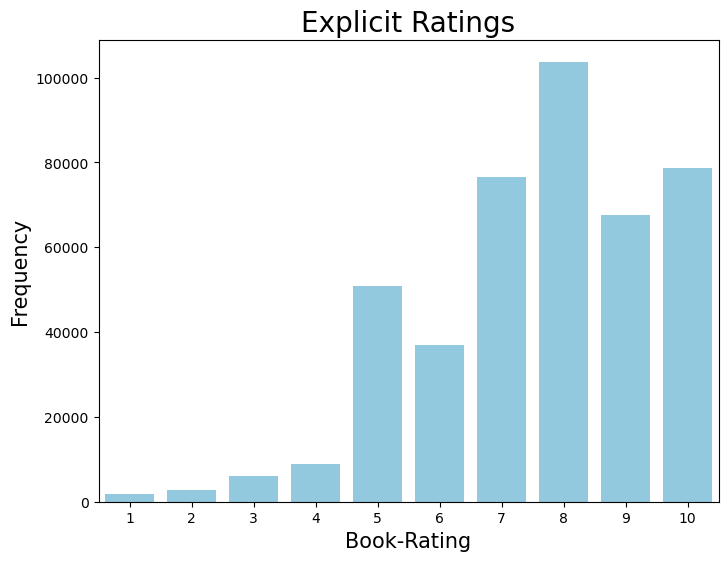

In [24]:
# Countplot of Ratings
plt.figure(figsize=(8,6))
data=Ratings[Ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data, color='skyblue')
plt.title("Explicit Ratings", fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Book-Rating', fontsize=15)
plt.show()

#### Merging User and Rating dataset into one

In [25]:
df=pd.merge(books, Ratings, on='ISBN')
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031132 entries, 0 to 1031131
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031132 non-null  object
 1   Book-Title           1031132 non-null  object
 2   Book-Author          1031132 non-null  object
 3   Year-Of-Publication  1031132 non-null  object
 4   Publisher            1031132 non-null  object
 5   Image-URL-S          1031132 non-null  object
 6   Image-URL-M          1031132 non-null  object
 7   Image-URL-L          1031132 non-null  object
 8   User-ID              1031132 non-null  int64 
 9   Book-Rating          1031132 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


In [27]:
# Checking for Unique values
df.nunique()

ISBN                   270148
Book-Title             241068
Book-Author            101586
Year-Of-Publication       116
Publisher               16726
Image-URL-S            269839
Image-URL-M            269839
Image-URL-L            269839
User-ID                 92106
Book-Rating                11
dtype: int64

In [28]:
# Checking for null values
df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
dtype: int64

In [29]:
# Checking for duplicates
df.duplicated().sum()

0

#### Filtering the users who gave atleast 200 ratings to the books

In [30]:
df.shape

(1031132, 10)

In [31]:
# Finding the users who gave 200+ ratings
df_user = df.groupby(['User-ID'])[['Book-Rating']].count()>=200
df_users_list = df_user[df_user].index
df_users_list  

Int64Index([     2,      8,      9,     10,     12,     14,     16,     17,
                19,     20,
            ...
            278832, 278836, 278838, 278843, 278844, 278846, 278849, 278851,
            278852, 278854],
           dtype='int64', name='User-ID', length=92106)

In [32]:
# filtering our df as per user who gave 200+ ratings
filtered_df=df[df['User-ID'].isin(df_users_list)]
filtered_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031127,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031128,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031129,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031130,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [33]:
# Finding the top popular books having more than 50 books
popular_books=filtered_df['Book-Title'].value_counts()>=50
#popular_books
true_indices = popular_books[popular_books].index
true_indices


Index(['Wild Animus', 'The Lovely Bones: A Novel', 'The Da Vinci Code',
       'A Painted House', 'The Nanny Diaries: A Novel',
       'Bridget Jones's Diary', 'The Secret Life of Bees',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'The Red Tent (Bestselling Backlist)', 'Angels &amp; Demons',
       ...
       'Fatal', 'Stone of Tears (Sword of Truth, Book 2)',
       'The SECRET DIARY OF ANNE BOLEYN', 'Creed for the Third Millennium',
       'Purple Cane Road',
       'The Blue Last: A Richard Jury Mystery (Richard Jury Mysteries (Paperback))',
       'Less Of A Stranger (Silhouette Single Title)', 'For the Sake of Elena',
       'Of Mice and Men', 'Longshot'],
      dtype='object', length=2444)

In [34]:
# Selecting the records of popular books
filtered_df=filtered_df[filtered_df['Book-Title'].isin(true_indices)]
filtered_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
30,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,8,0
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,29526,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
...,...,...,...,...,...,...,...,...,...,...
1030519,B00011SOYM,Grave Secrets,Kathy Reichs,2002,Scribner,http://images.amazon.com/images/P/B00011SOYM.0...,http://images.amazon.com/images/P/B00011SOYM.0...,http://images.amazon.com/images/P/B00011SOYM.0...,244708,0
1030541,0523416873,The Presence,Yvonne MacManus,1982,Pinnacle Books,http://images.amazon.com/images/P/0523416873.0...,http://images.amazon.com/images/P/0523416873.0...,http://images.amazon.com/images/P/0523416873.0...,244804,10
1030777,0399150684,Naked Prey,John Sandford,2003,Putnam Berkley Audio,http://images.amazon.com/images/P/0399150684.0...,http://images.amazon.com/images/P/0399150684.0...,http://images.amazon.com/images/P/0399150684.0...,250405,0
1030864,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8


In [35]:
# filtered_df=filtered_df[filtered_df['Book-Rating']>0]
# filtered_df

In [36]:
# Checking for unique books and users
filtered_df.nunique()

ISBN                    7085
Book-Title              2444
Book-Author             1761
Year-Of-Publication       63
Publisher                817
Image-URL-S             6997
Image-URL-M             6997
Image-URL-L             6997
User-ID                47994
Book-Rating               11
dtype: int64

In [37]:
filtered_df.shape

(288740, 10)

#### Merging Filtered_df with User dataset

In [38]:
filtered_df = pd.merge(filtered_df, Users, on='User-ID')
filtered_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,8,0,"timmins, ontario, canada"
1,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,8,0,"timmins, ontario, canada"
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a"
3,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11676,9,"n/a, n/a, n/a"
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,11676,8,"n/a, n/a, n/a"
...,...,...,...,...,...,...,...,...,...,...,...
288735,0571203418,Harvest,Christopher Hart,2001,Faber &amp; Faber Ltd,http://images.amazon.com/images/P/0571203418.0...,http://images.amazon.com/images/P/0571203418.0...,http://images.amazon.com/images/P/0571203418.0...,212984,0,"exeter, england, united kingdom"
288736,8425328055,Cujo,Stephen King,1995,Grijalbo,http://images.amazon.com/images/P/8425328055.0...,http://images.amazon.com/images/P/8425328055.0...,http://images.amazon.com/images/P/8425328055.0...,228196,0,"cornella de llobregat (barcelona), barcelona, ..."
288737,1401398391,The Art of Deception,Ridley Pearson,2003,Hyperion Books,http://images.amazon.com/images/P/1401398391.0...,http://images.amazon.com/images/P/1401398391.0...,http://images.amazon.com/images/P/1401398391.0...,228679,8,"hastings, nebraska, usa"
288738,1853716154,Lucy Sullivan Is Getting Married,Marian Keyes,1996,Poolbeg Pr Ltd,http://images.amazon.com/images/P/1853716154.0...,http://images.amazon.com/images/P/1853716154.0...,http://images.amazon.com/images/P/1853716154.0...,243368,2,"alkmaar, noordholland, netherlands"


In [39]:
# Checking for null values
filtered_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
dtype: int64

In [40]:
# Checking for duplicated values
filtered_df.duplicated().sum()

0

In [41]:
# Checking for unique values in filtered_df
filtered_df.nunique()

ISBN                    7085
Book-Title              2444
Book-Author             1761
Year-Of-Publication       63
Publisher                817
Image-URL-S             6997
Image-URL-M             6997
Image-URL-L             6997
User-ID                47994
Book-Rating               11
Location               13380
dtype: int64

# 1. Collaborative Filtering Recommender Systems

### Finding cosine similarity between users

To find the cosine similarity we have created user_book matrix and then fill NaN values with 0.

Then we have calculated cosine similarity

In [42]:
# Creating the User_book Matrix
user_book_matrix = pd.pivot_table(filtered_df, values='Book-Rating', index='Book-Title', columns='User-ID')
user_book_matrix

User-ID,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zoya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"\O\"" Is for Outlaw""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Fill missing values with 0
user_book_matrix = user_book_matrix.fillna(0)
user_book_matrix

User-ID,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Calculating cosine similarity
# user_similarity = 1 - pairwise_distances(user_book_matrix, metric='cosine')
book_similarity = cosine_similarity(user_book_matrix)
print(book_similarity)

[[1.         0.         0.         ... 0.01612747 0.         0.        ]
 [0.         1.         0.         ... 0.02471161 0.         0.        ]
 [0.         0.         1.         ... 0.00912194 0.00491208 0.02868142]
 ...
 [0.01612747 0.02471161 0.00912194 ... 1.         0.00689438 0.00847494]
 [0.         0.         0.00491208 ... 0.00689438 1.         0.06342582]
 [0.         0.         0.02868142 ... 0.00847494 0.06342582 1.        ]]


In [45]:
# Adding the user_siimilarity into a dataframe
book_similarity_df=pd.DataFrame(book_similarity)
book_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443
0,1.000000,0.000000,0.000000,0.041191,0.000000,0.000000,0.023748,0.000000,0.013080,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016127,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.013109,0.059830,0.229925,0.000000,0.000000,0.078466,0.047902,...,0.000000,0.000000,0.037901,0.000000,0.000000,0.035622,0.000000,0.024712,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.018545,0.046408,0.000000,0.000000,0.002812,0.002475,0.002337,...,0.007725,0.022879,0.003698,0.013392,0.006288,0.032888,0.020152,0.009122,0.004912,0.028681
3,0.041191,0.013109,0.018545,1.000000,0.007761,0.000000,0.000000,0.033840,0.154149,0.070527,...,0.042523,0.015796,0.055066,0.022468,0.028423,0.013863,0.065105,0.053587,0.011755,0.020471
4,0.000000,0.059830,0.046408,0.007761,1.000000,0.000000,0.124948,0.000000,0.000000,0.000000,...,0.000000,0.014614,0.000000,0.000000,0.000000,0.031636,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,0.000000,0.035622,0.032888,0.013863,0.031636,0.000000,0.000000,0.008535,0.009514,0.007092,...,0.023446,0.000000,0.011223,0.000000,0.019082,1.000000,0.020006,0.004268,0.036813,0.048104
2440,0.000000,0.000000,0.020152,0.065105,0.000000,0.000000,0.000000,0.034359,0.016281,0.015372,...,0.091476,0.027158,0.066028,0.000000,0.041361,0.020006,1.000000,0.036442,0.032313,0.039721
2441,0.016127,0.024712,0.009122,0.053587,0.000000,0.000000,0.000000,0.003947,0.027426,0.003280,...,0.010843,0.000000,0.049926,0.020139,0.008825,0.004268,0.036442,1.000000,0.006894,0.008475
2442,0.000000,0.000000,0.004912,0.011755,0.000000,0.000000,0.000000,0.013786,0.012132,0.011455,...,0.037870,0.000000,0.018127,0.000000,0.030821,0.036813,0.032313,0.006894,1.000000,0.063426


In [46]:
# Replacing index and column to book-title
#book_similarity_df.index=filtered_df['Book-Title'].unique()

#book_similarity_df.columns=filtered_df['Book-Title'].unique()
#book_similarity_df.head()

In [47]:
# Replacing the diagonal values with 0
np.fill_diagonal(book_similarity_df.values,0)
book_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443
0,0.000000,0.000000,0.000000,0.041191,0.000000,0.000000,0.023748,0.000000,0.013080,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016127,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.013109,0.059830,0.229925,0.000000,0.000000,0.078466,0.047902,...,0.000000,0.000000,0.037901,0.000000,0.000000,0.035622,0.000000,0.024712,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.018545,0.046408,0.000000,0.000000,0.002812,0.002475,0.002337,...,0.007725,0.022879,0.003698,0.013392,0.006288,0.032888,0.020152,0.009122,0.004912,0.028681
3,0.041191,0.013109,0.018545,0.000000,0.007761,0.000000,0.000000,0.033840,0.154149,0.070527,...,0.042523,0.015796,0.055066,0.022468,0.028423,0.013863,0.065105,0.053587,0.011755,0.020471
4,0.000000,0.059830,0.046408,0.007761,0.000000,0.000000,0.124948,0.000000,0.000000,0.000000,...,0.000000,0.014614,0.000000,0.000000,0.000000,0.031636,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,0.000000,0.035622,0.032888,0.013863,0.031636,0.000000,0.000000,0.008535,0.009514,0.007092,...,0.023446,0.000000,0.011223,0.000000,0.019082,0.000000,0.020006,0.004268,0.036813,0.048104
2440,0.000000,0.000000,0.020152,0.065105,0.000000,0.000000,0.000000,0.034359,0.016281,0.015372,...,0.091476,0.027158,0.066028,0.000000,0.041361,0.020006,0.000000,0.036442,0.032313,0.039721
2441,0.016127,0.024712,0.009122,0.053587,0.000000,0.000000,0.000000,0.003947,0.027426,0.003280,...,0.010843,0.000000,0.049926,0.020139,0.008825,0.004268,0.036442,0.000000,0.006894,0.008475
2442,0.000000,0.000000,0.004912,0.011755,0.000000,0.000000,0.000000,0.013786,0.012132,0.011455,...,0.037870,0.000000,0.018127,0.000000,0.030821,0.036813,0.032313,0.006894,0.000000,0.063426


In [48]:
filtered_df['Book-Title']

0                                    The Kitchen God's Wife
1         A Second Chicken Soup for the Woman's Soul (Ch...
2                                    The Kitchen God's Wife
3                                             The Testament
4                      Beloved (Plume Contemporary Fiction)
                                ...                        
288735                                              Harvest
288736                                                 Cujo
288737                                 The Art of Deception
288738                     Lucy Sullivan Is Getting Married
288739                                               Anthem
Name: Book-Title, Length: 288740, dtype: object

In [49]:
def get_recommendation(book_name):
    if book_name in user_book_matrix.index:
        
        # Taking the index of user_book_matrix and matching with book_similarity_df
        index_number = user_book_matrix.index.get_loc(book_name)
        
        # Adding the similar books index to a list
        similar_books = book_similarity_df.iloc[index_number].sort_values(ascending=False).head(6).index[1:].tolist()
        
        # Finding the book name from the user_book_matrix
        top_similar_books = user_book_matrix.iloc[similar_books].index.tolist()
        
        data = []
        for i in top_similar_books:
            item = []
            temp_df = filtered_df[filtered_df['Book-Title'] == i]
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
            
            data.append(item)
            
        return data        
        
        #return top_similar_books
    else:
        print('No Similar Books')

In [50]:
get_recommendation('1984')

[['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['American Psycho (Vintage Contemporaries)',
  'Bret Easton Ellis',
  'http://images.amazon.com/images/P/0679735771.01.MZZZZZZZ.jpg'],
 ["Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death",
  'Kurt Vonnegut',
  'http://images.amazon.com/images/P/0440180295.01.MZZZZZZZ.jpg'],
 ['Lying Awake',
  'Mark Salzman',
  'http://images.amazon.com/images/P/0375406328.01.MZZZZZZZ.jpg'],
 ['Lord of the Flies',
  'William Gerald Golding',
  'http://images.amazon.com/images/P/0399501487.01.MZZZZZZZ.jpg']]

In [51]:
get_recommendation('The Notebook')

[['Message in a Bottle',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446523569.01.MZZZZZZZ.jpg'],
 ['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['The Wedding',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446532452.01.MZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ["Suzanne's Diary for Nicholas",
  'James Patterson',
  'http://images.amazon.com/images/P/0316969443.01.MZZZZZZZ.jpg']]

In [52]:
get_recommendation('Wild Animus')

[['Living History',
  'Hillary Rodham Clinton',
  'http://images.amazon.com/images/P/0743222245.01.MZZZZZZZ.jpg'],
 ['Long Dark Tea Time of the Soul',
  'Douglas Adams',
  'http://images.amazon.com/images/P/0671742515.01.MZZZZZZZ.jpg'],
 ['Grave Secrets (Temperance Brennan Novel (Hardcover))',
  'Kathy Reichs',
  'http://images.amazon.com/images/P/0684859734.01.MZZZZZZZ.jpg'],
 ['Welcome to Dead House (Goosebumps, No 1)',
  'R. L. Stine',
  'http://images.amazon.com/images/P/0590453653.01.MZZZZZZZ.jpg'],
 ['Lovers',
  'Linda Sunshine',
  'http://images.amazon.com/images/P/1878685031.01.MZZZZZZZ.jpg']]

In [53]:
get_recommendation('The Hobbit : The Enchanting Prelude to The Lord of the Rings')

[['The Return of the King (The Lord of the Rings, Part 3)',
  'J. R. R. Tolkien',
  'http://images.amazon.com/images/P/0395272211.01.MZZZZZZZ.jpg'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg']]

# 2. Popularity Based Approach

In popularity based approach we will take the popular books on which there are 200+ Ratings are given by the user.

In this approach we will consider the avg rating by the users.

In [54]:
# we are grouping the books and counting their ratings
B_ratings = df.groupby(['Book-Title'])[['Book-Rating']].count().reset_index()
B_ratings.rename(columns={'Book-Rating':'Num_Rating'}, inplace=True)
B_ratings = B_ratings[B_ratings['Num_Rating']>=200]
B_ratings

,Book-Title,Num_Rating
764,1984,284
818,1st to Die: A Novel,509
1048,2nd Chance,356
1760,A Bend in the Road,346
2120,A Case of Need,236
...,...,...
234948,Wild Animus,2502
236331,Wish You Well,234
236721,Without Remorse,203
240410,Zen and the Art of Motorcycle Maintenance: An ...,210


In [55]:
# Taking the average rating of the books
avg_rating = df.groupby(['Book-Title'])[['Book-Rating']].mean().reset_index()
avg_rating.rename(columns={'Book-Rating':'Avg_Rating'}, inplace=True)
avg_rating = pd.merge(avg_rating, B_ratings, on='Book-Title').sort_values('Avg_Rating', ascending = False).head(100)
avg_rating

,Book-Title,Avg_Rating,Num_Rating
93,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
91,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
94,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
92,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
67,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639,249
...,...,...,...
45,Chicken Soup for the Soul (Chicken Soup for th...,3.575610,205
76,Five Quarters of the Orange,3.574879,207
159,She's Come Undone (Oprah's Book Club),3.570513,468
232,The Notebook,3.560000,650


In [56]:
# We are adding the details of the top 100 books 
popular100_books = pd.merge(avg_rating, books, on='Book-Title')[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Num_Rating', 'Avg_Rating', 'Image-URL-M']]

# After merging with books table we found duplicates in Book-Title
popular100_books = popular100_books.drop_duplicates('Book-Title')
popular100_books

,Book-Title,Book-Author,Year-Of-Publication,Num_Rating,Avg_Rating,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,428,5.852804,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,387,5.824289,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,278,5.737410,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,347,5.501441,http://images.amazon.com/images/P/043935806X.0...
13,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1992,249,5.409639,http://images.amazon.com/images/P/0312853238.0...
...,...,...,...,...,...,...
357,Chicken Soup for the Soul (Chicken Soup for th...,Jack Canfield,1993,205,3.575610,http://images.amazon.com/images/P/155874262X.0...
358,Five Quarters of the Orange,Joanne Harris,2002,207,3.574879,http://images.amazon.com/images/P/0060958022.0...
361,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,468,3.570513,http://images.amazon.com/images/P/0671021001.0...
362,The Notebook,Nicholas Sparks,1998,650,3.560000,http://images.amazon.com/images/P/0446605239.0...


## Creating pickle file for Popular Approach

In [57]:
import pickle
#pickle.dump(popular100_books, open('popular.pkl', 'wb'))

In [58]:
#pickle.dump